In [1]:
import pandas as pd
import numpy as np
import pymysql.cursors
import pandas as pd 
import numpy as np 
import configparser
import os, sys
import os.path
from os import path
import os.path
import re
import mysql.connector as sql
import datetime as dt
import os 
import mysql



In [28]:
time_update=dt.datetime.now()
time_update=time_update.strftime('%Y-%m-%d %H:%M:%S')
time_update

'2020-11-09 08:32:04'

In [32]:
# date_receipt= pd.read_csv('./notifier/latest_date_notifier.csv')
# date_receipt['latest_date'].astype('datetime64[ns]')
date_receipt= pd.read_csv('./notifier/latest_date_notifier.csv')
# date_receipt= date_receipt.set_index('source_db')
timefolder=dt.datetime.now()
timefolder=timefolder.strftime('%Y%m%d')
config = configparser.ConfigParser()
config.read("./notifier/config.ini")
confDB_host= config["SERVER_TARGET"]["database_url"]
confDB_username= config["SERVER_TARGET"]["database_username"]
confDB_pass=config["SERVER_TARGET"]["database_password"]
confDB_port= int(config["SERVER_TARGET"]["database_port"])
list_kota_in_db= list(date_receipt['source_db'])
list_date_in_kota=list(date_receipt['latest_date'])

In [ ]:
new_kota='tb-kab_california'
if new_kota in list(date_receipt['source_db']):
    print('nothing happens')
else:
    list_kota_in_db.append(new_kota)
    time_to_update=dt.datetime.now()
    time_to_update=time_to_update.strftime('%Y-%m-%d %H:%M:%S')
    list_date_in_kota.append(time_to_update)
    print('added new data ',new_kota,' - ',time_to_update )

In [ ]:
# date_receipt= pd.read_csv('./notifier/latest_date_notifier.csv')
# date_receipt['latest_date'].astype('datetime64[ns]')
date_receipt= pd.read_csv('./notifier/latest_date_notifier.csv')
# date_receipt= date_receipt.set_index('source_db')
timefolder=dt.datetime.now()
timefolder=timefolder.strftime('%Y%m%d')
config = configparser.ConfigParser()
config.read("./notifier/config.ini")
confDB_host= config["SERVER_TARGET"]["database_url"]
confDB_username= config["SERVER_TARGET"]["database_username"]
confDB_pass=config["SERVER_TARGET"]["database_password"]
confDB_port= int(config["SERVER_TARGET"]["database_port"])
list_kota_in_db= list(date_receipt['source_db'])
list_date_in_kota=list(date_receipt['latest_date'])

conn = mysql.connector.connect (user=confDB_username, password=confDB_pass,
                               host=confDB_host,buffered=True,charset='utf8mb4',port=confDB_port)
cursor = conn.cursor()
databases = ("show databases")
cursor.execute(databases)
# get the list of existing databse
listdb=[]
for db in cursor:
    listdb.append(db[0])
## SELECT THE TB AND DASHMANTAP
listdb_new=[]
for i in listdb:
    if 'tb' in i:
        listdb_new.append(i)
    elif 'tb' in i:
        listdb_new.append(i)
    else:
        a=i
        

list_check_table=[]
list_check_db=[]
df_to_merge=[]
list_db_test=['tb-bogor']




# # for db in listDB:
for db in listdb_new:
    if db in list(date_receipt['source_db']):
        pass
#         print('nothing happens')
    else:
        list_kota_in_db.append(new_kota)
        time_to_update=dt.datetime.now()
        time_to_update=time_to_update.strftime('%Y-%m-%d %H:%M:%S')
        list_date_in_kota.append(time_to_update)
        print('added new DB ',new_kota,' - ',time_to_update )
        
        
date_receipt['source_db']=list_kota_in_db
date_receipt['latest_date']=list_date_in_kota
# date_receipt
date_receipt.to_csv('./notifier/latest_date_notifier.csv')
# date_receipt= pd.read_csv('./notifier/latest_date_notifier.csv')

## importing the necessary library

In [60]:
# date_receipt= date_receipt.reset_index()
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy 
import sklearn 
import sys
import numpy as np 
from sklearn.model_selection import train_test_split 


## import the data and also the correletion matrix

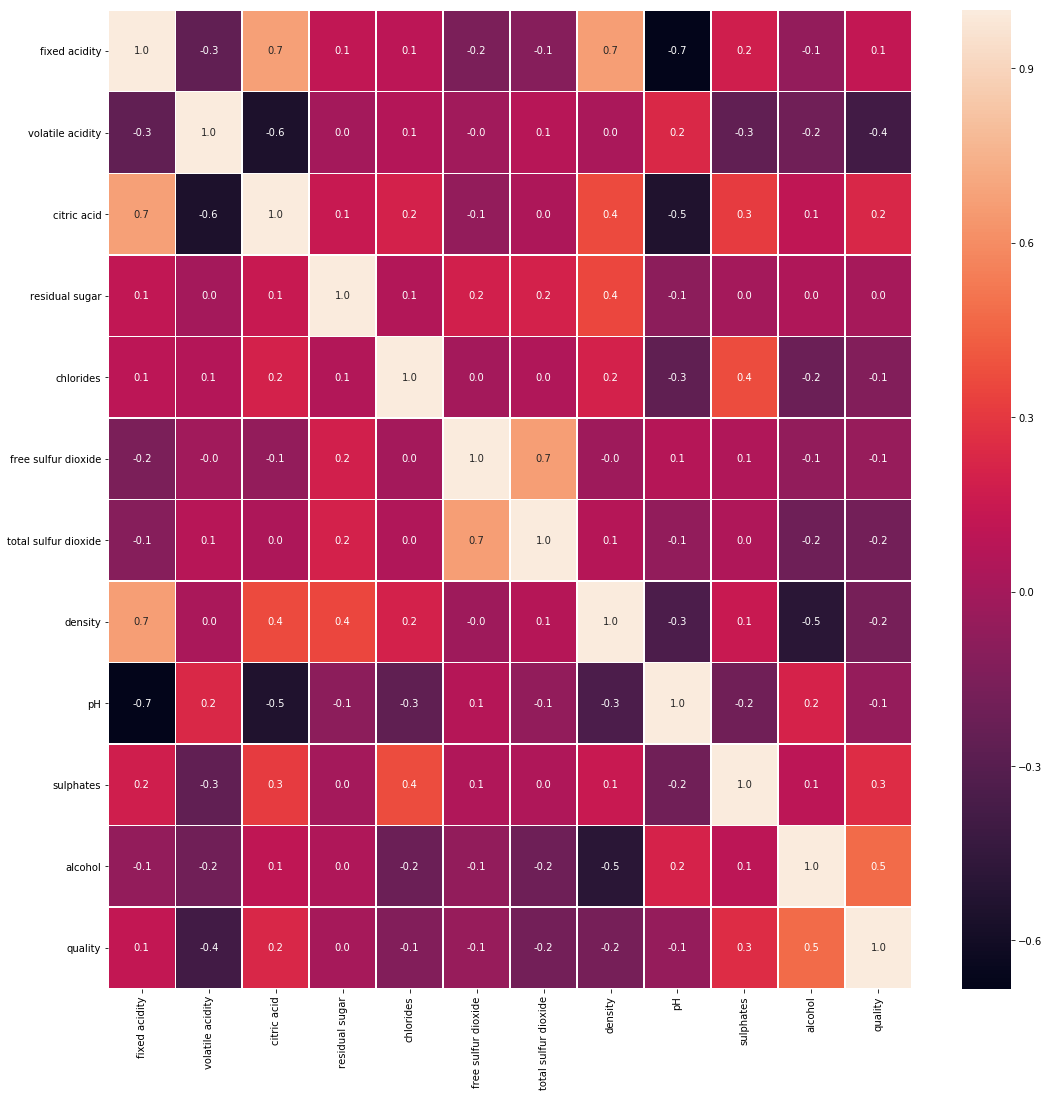

In [364]:
winequality =pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(winequality.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## splitting the data train and test

In [365]:
inputs= winequality.drop(columns=['quality'])
target= winequality['quality']
x_train, x_test,y_train,y_test= train_test_split(inputs,target,train_size=0.3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# 1.random forest library 

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
modelRF= RandomForestClassifier(n_estimators=50,bootstrap=True,criterion='gini')
modelRF.fit(x_train,y_train)
prediction_rf= modelRF.predict(x_test)
training_score_RF= modelRF.score(x_test,y_test) ## training score RF

In [87]:

# Probabilities for each class
rf_probs = model.predict_proba(x_test)[:, 1]

## evaluating the model 

In [222]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(confusion_matrix(y_test,prediction_rf))
# print(classification_report(y_test,prediction_rf))
# print(accuracy_score(y_test, prediction_rf))
accuracy_scoreRF= accuracy_score(y_test, prediction_rf)
accuracy_scoreRF

0.6205357142857143

In [90]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
try:
    roc_value = roc_auc_score(y_test, rf_probs)
except Exception as e:
    print(e)

multiclass format is not supported


## feature importance

In [112]:
f1_RF = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': modelRF.feature_importances_}).\
                    sort_values('importance', ascending = False)


In [113]:
f1_RF

,feature,importance
10,alcohol,0.155217
6,total sulfur dioxide,0.109700
9,sulphates,0.101673
1,volatile acidity,0.100768
7,density,0.089628
4,chlorides,0.082938
0,fixed acidity,0.076236
2,citric acid,0.074402
3,residual sugar,0.073441
8,pH,0.072791


# 2. decision Tree

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

In [223]:
from sklearn import tree
modelDT= tree.DecisionTreeClassifier(criterion='gini')
modelDT.fit(x_train,y_train)

prediction_DT= modelDT.predict(x_test)


## accuracy on the training model

In [133]:
training_scoreDT= modelDT.score(x_test,y_test) ## result on training test
training_scoreDT

0.55

## evaluation of the model

In [227]:
# print(confusion_matrix(y_test,prediction_DT))
# print(classification_report(y_test,prediction_DT))
# print(accuracy_score(y_test, prediction_DT))
accuracy_scoreDT= accuracy_score(y_test, prediction_DT)
accuracy_scoreDT

0.5446428571428571

## feature importance

In [130]:
f1_DT = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': modelDT.feature_importances_}).\
                    sort_values('importance', ascending = False)
f1_DT


,feature,importance
10,alcohol,0.167912
1,volatile acidity,0.120800
9,sulphates,0.120086
7,density,0.106893
6,total sulfur dioxide,0.085869
0,fixed acidity,0.084178
5,free sulfur dioxide,0.078457
2,citric acid,0.076506
4,chlorides,0.062618
3,residual sugar,0.057781



# 3. gradient boosting

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
modelGB= GradientBoostingClassifier(learning_rate=0.5)
modelGB.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

## accuracy on the training  model

In [132]:
training_scoreGB=model.score(x_test,y_test)
training_scoreGB

0.6232142857142857

In [120]:
prediction_GB= modelGB.predict(x_test)

### metrics accuracy

In [229]:
from sklearn import metrics
metrics.accuracy_score(y_test,prediction_rf)
# confusion_matrix(y_test,prediction_GB)
# print(classification_report(y_test,prediction_GB))
# print(accuracy_score(y_test, prediction_GB))
accuracy_scoreGB= accuracy_score(y_test, prediction_GB)
accuracy_scoreGB

0.6053571428571428


### feature importance Gradient Boosting

In [131]:
f1_GB = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': modelGB.feature_importances_}).\
                    sort_values('importance', ascending = False)
f1_GB


,feature,importance
1,volatile acidity,0.095786
7,density,0.074706
6,total sulfur dioxide,0.073710
4,chlorides,0.071126
2,citric acid,0.063646
10,alcohol,0.062434
9,sulphates,0.057550
0,fixed acidity,0.055947
8,pH,0.048208
3,residual sugar,0.042787


# summary model

In [207]:
f1_DT_join= f1_DT.reset_index().reset_index().drop(columns=['index',],axis=1).rename(columns={'level_0':'peringkatDT',
                                                                                  'importance':'importance_DT'})
f1_GB_join= f1_GB.reset_index().reset_index().drop(columns=['index',],axis=1).rename(columns={'level_0':'peringkatGB',
                                                                                  'importance':'importance_GB'})
f1_RF_join= f1_RF.reset_index().reset_index().drop(columns=['index',],axis=1).rename(columns={'level_0':'peringkatRF',
                                                                                  'importance':'importance_RF'})

In [218]:
# pd.merge(f1_RF_join,f1_GB_join,how='left',left_on='feature',right_on='feature')
final_importance= pd.merge(f1_DT_join,pd.merge(f1_RF_join,f1_GB_join,how='left',left_on='feature',right_on='feature'),how='left',left_on='feature',right_on='feature')
# final_importance.reindex()
final_importance=final_importance.reindex(['feature', 'peringkatRF','peringkatDT',  'peringkatGB', 'importance_RF',
       'importance_DT', 'importance_GB'],axis=1)


In [219]:
final_importance

,feature,peringkatRF,peringkatDT,peringkatGB,importance_RF,importance_DT,importance_GB
0,alcohol,0,0,5,0.155217,0.167912,0.062434
1,volatile acidity,3,1,0,0.100768,0.120800,0.095786
2,sulphates,2,2,6,0.101673,0.120086,0.057550
3,density,4,3,1,0.089628,0.106893,0.074706
4,total sulfur dioxide,1,4,2,0.109700,0.085869,0.073710
5,fixed acidity,6,5,7,0.076236,0.084178,0.055947
6,free sulfur dioxide,10,6,10,0.063206,0.078457,0.042432
7,citric acid,7,7,4,0.074402,0.076506,0.063646
8,chlorides,5,8,3,0.082938,0.062618,0.071126
9,residual sugar,8,9,9,0.073441,0.057781,0.042787


In [238]:
listaccuracy= list((accuracy_scoreDT,accuracy_scoreGB,accuracy_scoreRF))
# type(listaccuracy)
summary= pd.DataFrame(columns=['test_accuracy'])
summary['test_accuracy']= listaccuracy
summary['train_accuracy']= list((training_scoreDT,training_scoreGB,training_score_RF))
summary

,test_accuracy,train_accuracy
0,0.544643,0.550000
1,0.605357,0.623214
2,0.620536,0.620536


### trial error the parameter tunning

#### effect of learning rate to the accuracy

In [167]:
for a in range(1,10):
    b=0+a/10
#     print(0+a/10)
    modelGB_= GradientBoostingClassifier(learning_rate=b)
    modelGB_.fit(x_train,y_train)
    prediction_GB_= modelGB_.predict(x_test)
    accuracyGB_= accuracy_score(y_test, prediction_GB_)
    print('with ',b,'as the learning rate, result = ',accuracyGB_)

with  0.1 as the learning rate, result =  0.5991071428571428
with  0.2 as the learning rate, result =  0.5875
with  0.3 as the learning rate, result =  0.59375
with  0.4 as the learning rate, result =  0.5857142857142857
with  0.5 as the learning rate, result =  0.5741071428571428
with  0.6 as the learning rate, result =  0.5866071428571429
with  0.7 as the learning rate, result =  0.5830357142857143
with  0.8 as the learning rate, result =  0.5776785714285714
with  0.9 as the learning rate, result =  0.5741071428571428


#### effect of n_estimators on the accucary random forest

In [175]:
number_of_trees= []
result_accuracy=[]
for a in range(1,40):
    b=a*10
    number_of_trees.append(b
    modelRF_= RandomForestClassifier(n_estimators=b,bootstrap=True,criterion='gini')
    modelRF_.fit(x_train,y_train)
    prediction_rf_= modelRF_.predict(x_test)
    training_score_RF_= modelRF_.score(x_test,y_test)
    result_accuracy.append(train
    print('with ',b,' as the number of trees , accuracy is = ',training_score_RF_)

with  10  as the number of trees , accuracy is =  0.5973214285714286
with  20  as the number of trees , accuracy is =  0.61875
with  30  as the number of trees , accuracy is =  0.6098214285714286
with  40  as the number of trees , accuracy is =  0.6160714285714286
with  50  as the number of trees , accuracy is =  0.6133928571428572
with  60  as the number of trees , accuracy is =  0.6294642857142857
with  70  as the number of trees , accuracy is =  0.6303571428571428
with  80  as the number of trees , accuracy is =  0.6276785714285714
with  90  as the number of trees , accuracy is =  0.6303571428571428
with  100  as the number of trees , accuracy is =  0.6410714285714286
with  110  as the number of trees , accuracy is =  0.6196428571428572
with  120  as the number of trees , accuracy is =  0.6232142857142857
with  130  as the number of trees , accuracy is =  0.6339285714285714
with  140  as the number of trees , accuracy is =  0.63125
with  150  as the number of trees , accuracy is =  

#### univariate feature selection

In [196]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=8).fit(x_train, y_train)
select_feature

SelectKBest(k=8, score_func=<function chi2 at 0x000001DC48B5F950>)

In [194]:
featureselection = pd.DataFrame(columns=['columns','score'])
featureselection['score']= list(select_feature.scores_)
featureselection['columns']= x_train.columns
featureselection

,columns,score
0,fixed acidity,4.315498
1,volatile acidity,5.032062
2,citric acid,4.708411
3,residual sugar,5.134975
4,chlorides,0.247965
5,free sulfur dioxide,91.157529
6,total sulfur dioxide,920.882408
7,density,0.000074
8,pH,0.071871
9,sulphates,1.257044


### create model with different approach

Accuracy is:  0.6223214285714286


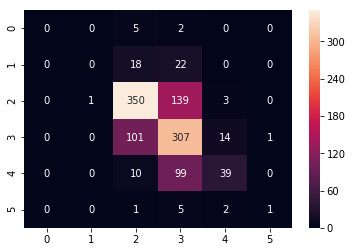

In [197]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(n_estimators=100)      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

## what if we standardize the scale

In [293]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 

In [302]:

# 5. Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestClassifier(n_estimators=100))
 
# 6. Declare hyperparameters to tune
hyperparameters = { 'randomforestclassifier__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestclassifier__max_depth': [None, 5, 3, 1]}
 
# 7. Tune model using cross-validation pipeline
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
clf.fit(x_train, y_train)
 
# 8. Refit on the entire training set
# No additional code needed if clf.refit == True (default is True)
 
# 9. Evaluate model pipeline on test data
pred = clf.predict(x_test)
# print r2_score(y_test, pred)
# print mean_squared_error(y_test, pred)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [312]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
cv_score= cross_val_score(modelGB, inputs, target, cv=10)
cv_score.mean()

0.5578136503054826

## for imbalanced dataset

## trying the smothe

In [366]:
winequality_6= winequality[(winequality['quality']==5) | (winequality['quality']==6) ]

In [369]:
inputs= winequality_6.drop(columns=['quality'])
target= winequality_6['quality']
x_train, x_test,y_train,y_test= train_test_split(inputs,target,train_size=0.3)
modelRF_= RandomForestClassifier(n_estimators=50,bootstrap=True,criterion='gini')
modelRF_.fit(x_train,y_train)
prediction_rf_= modelRF_.predict(x_test)
# training_score_RF_= modelRF.score(x_test,y_test) ## training score RF

# print(confusion_matrix(y_test,prediction_rf_))
print(classification_report(y_test,prediction_rf_))
# print(accuracy_score(y_test, prediction_rf))
# accuracy_score(y_test, prediction_rf_)

             precision    recall  f1-score   support

          5       0.72      0.77      0.74       476
          6       0.74      0.67      0.70       448

avg / total       0.73      0.73      0.72       924



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [334]:
winequality_6['quality'].value_counts()

6    638
4     53
Name: quality, dtype: int64

In [ ]:

import pandas as pd 
data= pd.read_csv('read_yourfile.csv',sep='|')
data['new_column']=data['column_to_clean'].str.replace("'",'')
data.drop(columns=['column_to_clean'],inplace=True)
data.to_csV('newfile.csv',sep='|',index= False)

In [382]:
Df= pd.DataFrame(columns=['test'])
Df.loc[0]= "'pada dasarnya bakal ada ' di akhir juga"
# Df
for a in Df['test']:
    if a[0]=="'":
        print(a[1:len(a)])
    else:
        print('aman')

pada dasarnya bakal ada ' di akhir juga


In [362]:
# data= pd.DataFrame(columns=['test'])
# data=winequality['fixed acidity']
# winequality_6['hapus']= winequality['fixed acidity'].map(str)+"'"
# data['test']= lists
# data['hapus']
# winequality_6['hapus'].str.replace("'",'')

3       11.2
18       7.4
19       7.9
20       8.9
24       6.9
29       7.8
31       6.9
33       6.9
35       7.8
36       7.8
38       5.7
41       8.8
42       7.5
45       4.6
51       6.6
52       6.6
54       7.6
59       7.3
69       8.0
70       7.7
73       8.3
77       6.8
79       8.3
84       6.3
86       8.6
91       8.6
94       5.0
95       4.7
99       8.1
100      8.3
        ... 
1540     6.2
1542     6.7
1543    11.1
1545     6.5
1552     6.3
1554     6.6
1557     6.6
1565     6.7
1566     6.7
1569     6.2
1570     6.4
1571     6.4
1573     6.0
1574     5.6
1575     7.5
1576     8.0
1577     6.2
1578     6.8
1580     7.4
1585     7.2
1586     7.5
1587     5.8
1588     7.2
1590     6.3
1591     5.4
1592     6.3
1593     6.8
1595     5.9
1596     6.3
1598     6.0
Name: hapus, Length: 691, dtype: object